# Tools — Agregacja wyników wielu osób (Projekt A) — FIXED

## Dlaczego wcześniej nie znalazło folderów `..._anon`?
Najczęstszy powód: uruchomiłeś notebook agregujący z folderu `tools/`, a on szukał w `ROOT="."`,
czyli **w `tools/`**, a foldery studentów powstawały obok notebooków (np. `notebooks_student/`).

W tej wersji:
- domyślny `ROOT` jest ustawiony na katalog **nadrzędny** (`..`),
- wyszukiwanie jest **rekurencyjne** (przeszukuje podfoldery),
- pokazujemy listę znalezionych plików, żeby łatwo debugować.

Jeśli dalej nic nie znajdzie — ustaw `ROOT` ręcznie na katalog, w którym leżą `outputs_studentA_*`.


In [75]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import sys

# import rnnlab
sys.path.append(os.path.abspath(".."))
import rnnlab


In [76]:
# ====== USTAW ROOT ======
# Domyślnie: katalog nadrzędny względem tools/ (tam, gdzie zwykle leżą outputs_studentA_*)
ROOT = os.path.abspath("..")

# Jeśli odpalałeś notebooki z innego miejsca, ustaw ROOT ręcznie, np.:
# ROOT = "/home/piotr/path/to/rnn_team_projects_ACD_v2"

print("ROOT =", ROOT)


ROOT = /home/piotr/Documents/zajecia/DNN/CS-DNN/tutorials/project/2/rnn_team_projects_ACD_v2


In [77]:
# ====== ZNAJDŹ CSV (rekurencyjnie) ======
pattern = os.path.join(ROOT, "**", "outputs_studentA_*", "A_runs_*.csv")
csv_paths = glob.glob(pattern, recursive=True)

print("Found CSVs:", len(csv_paths))
for p in csv_paths[:20]:
    print(" -", p)


Found CSVs: 22
 - /home/piotr/Documents/zajecia/DNN/CS-DNN/tutorials/project/2/rnn_team_projects_ACD_v2/notebooks_student/outputs_studentA_anon3/A_runs_lstm_h32_poollast.csv
 - /home/piotr/Documents/zajecia/DNN/CS-DNN/tutorials/project/2/rnn_team_projects_ACD_v2/notebooks_student/outputs_studentA_anon3_hidden/A_runs_lstm_h16_poollast.csv
 - /home/piotr/Documents/zajecia/DNN/CS-DNN/tutorials/project/2/rnn_team_projects_ACD_v2/notebooks_student/outputs_studentA_anon3_hidden/A_runs_lstm_h8_poollast.csv
 - /home/piotr/Documents/zajecia/DNN/CS-DNN/tutorials/project/2/rnn_team_projects_ACD_v2/notebooks_student/outputs_studentA_anon1/A_runs_lstm_h32_poollast.csv
 - /home/piotr/Documents/zajecia/DNN/CS-DNN/tutorials/project/2/rnn_team_projects_ACD_v2/notebooks_student/outputs_studentA_anon8_hidden/A_runs_gru_h8_poollast.csv
 - /home/piotr/Documents/zajecia/DNN/CS-DNN/tutorials/project/2/rnn_team_projects_ACD_v2/notebooks_student/outputs_studentA_anon8_hidden/A_runs_lstm_h8_poollast.csv
 - /hom

In [78]:
# ====== LOAD + CONCAT ======
dfs = []
for p in csv_paths:
    df = pd.read_csv(p)
    df["source_path"] = p
    dfs.append(df)

all_runs = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
print("Total rows:", len(all_runs))
display(all_runs.head())


Total rows: 198


,model,pooling,task_variant,seq_len,hidden,seed,best_test_acc,success,steps_ran,train_time_sec,source_path
0,lstm,last,distractors,50,32,0,0.517578,0,600,16.203053,/home/piotr/Documents/zajecia/DNN/CS-DNN/tutor...
1,lstm,last,distractors,50,32,1,0.517578,0,600,14.974860,/home/piotr/Documents/zajecia/DNN/CS-DNN/tutor...
2,lstm,last,distractors,50,32,2,0.537109,0,600,17.660708,/home/piotr/Documents/zajecia/DNN/CS-DNN/tutor...
3,lstm,last,distractors,90,32,0,0.515625,0,600,24.285427,/home/piotr/Documents/zajecia/DNN/CS-DNN/tutor...
4,lstm,last,distractors,90,32,1,0.511719,0,600,26.599961,/home/piotr/Documents/zajecia/DNN/CS-DNN/tutor...


In [79]:
# ====== SUMMARIZE ======
if len(all_runs) > 0:
    summary = rnnlab.summarize_frontier(all_runs)
    display(summary.head(20))
else:
    summary = None


,model,pooling,seq_len,hidden,P_success,mean_best_acc,std_best_acc,mean_steps
0,gru,attn,10,8,1.000000,1.000000,0.000000,300.000000
1,gru,attn,25,4,1.000000,1.000000,0.000000,300.000000
2,gru,attn,25,8,1.000000,1.000000,0.000000,300.000000
3,gru,attn,30,8,1.000000,1.000000,0.000000,300.000000
4,gru,attn,35,4,1.000000,1.000000,0.000000,300.000000
5,gru,attn,35,8,1.000000,1.000000,0.000000,300.000000
6,gru,attn,45,4,1.000000,1.000000,0.000000,300.000000
7,gru,attn,50,8,1.000000,1.000000,0.000000,300.000000
8,gru,last,10,8,1.000000,1.000000,0.000000,300.000000
9,gru,last,25,4,0.666667,0.840495,0.276271,500.000000


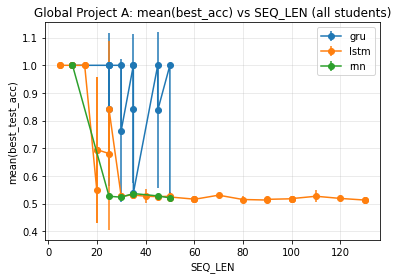

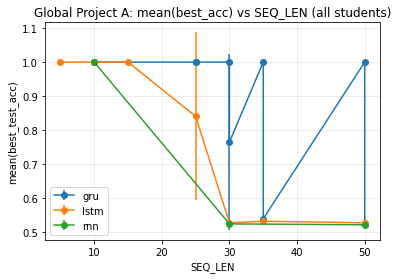

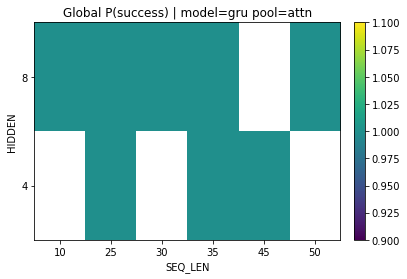

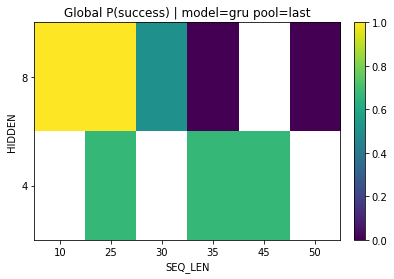

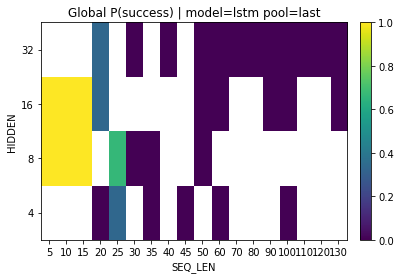

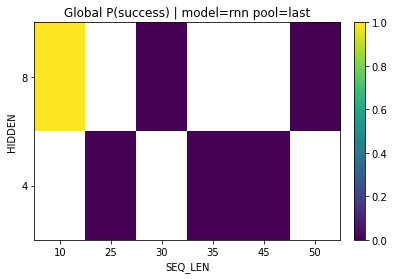

In [80]:
# ====== PLOTS ======
if summary is not None:
    rnnlab.plot_lines_acc(summary, title="Global Project A: mean(best_acc) vs SEQ_LEN (all students)")
    rnnlab.plot_lines_acc(summary[summary["hidden"] == 8], title="Global Project A: mean(best_acc) vs SEQ_LEN (all students)")
    plt.show()

    # heatmapy P_success per model+pooling
    for (m, pool) in sorted(summary[["model","pooling"]].drop_duplicates().itertuples(index=False, name=None)):
        sdf = summary[(summary["model"]==m) & (summary["pooling"]==pool)].copy()
        if len(sdf["hidden"].unique())>=2 and len(sdf["seq_len"].unique())>=2:
            rnnlab.plot_heatmap(
                sdf,
                value_col="P_success",
                title=f"Global P(success) | model={m} pool={pool}",
            )
            plt.show()
